# Sparse Hebbian Learning : reproducing SparseNet

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 0
N_scan = 7

shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)
data = shl.get_data()

## different learning rates

IndexError: index -9223372036854775552 is out of bounds for axis 1 with size 41472

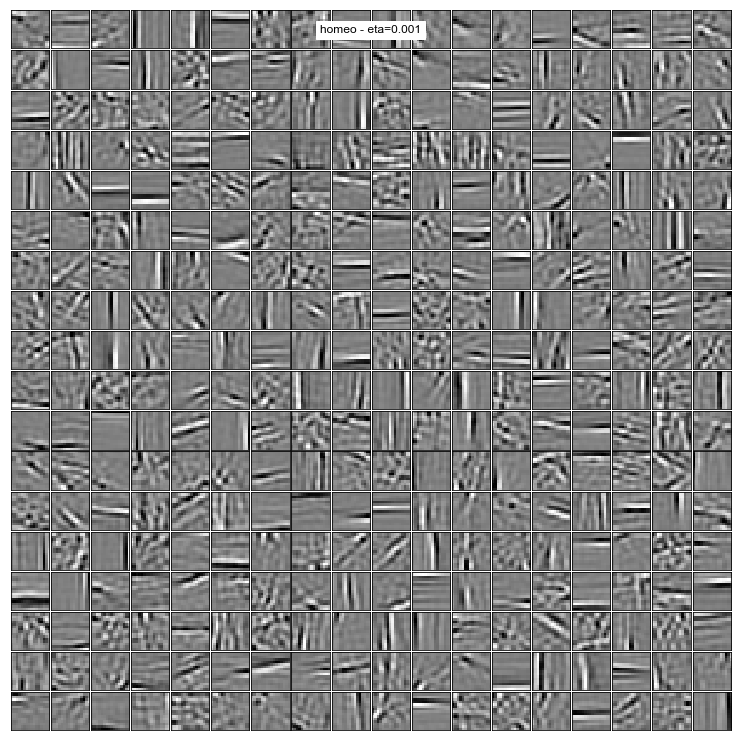

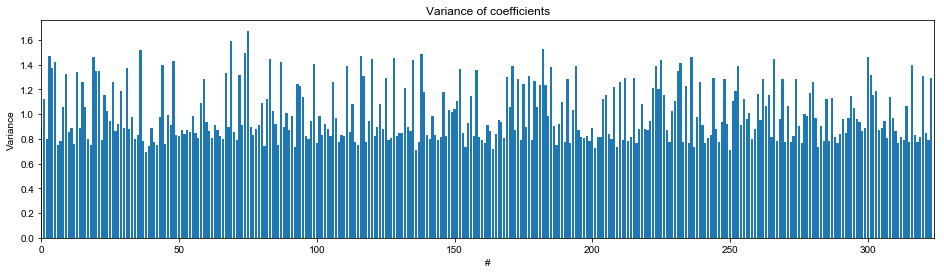

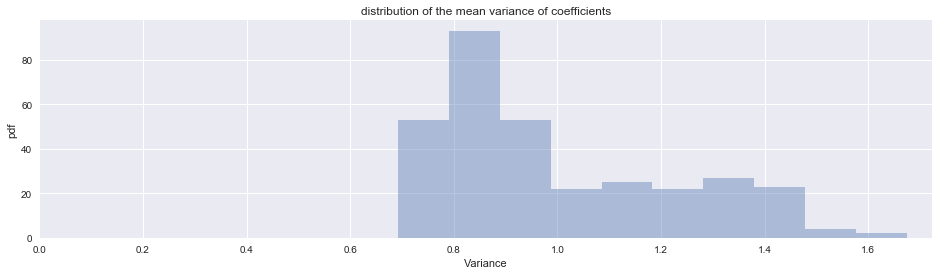

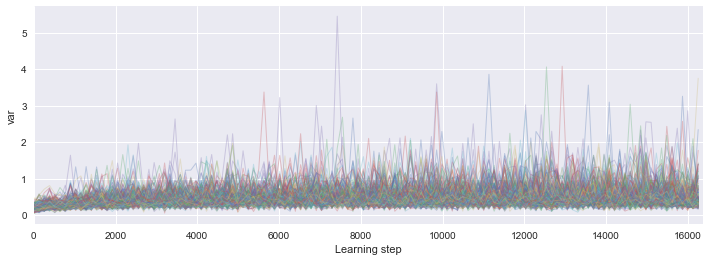

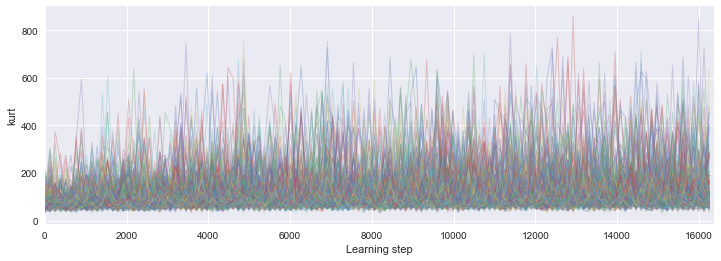

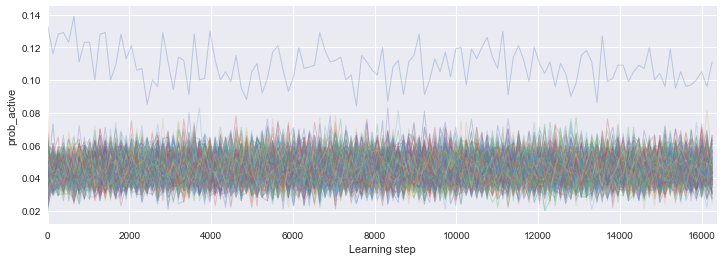

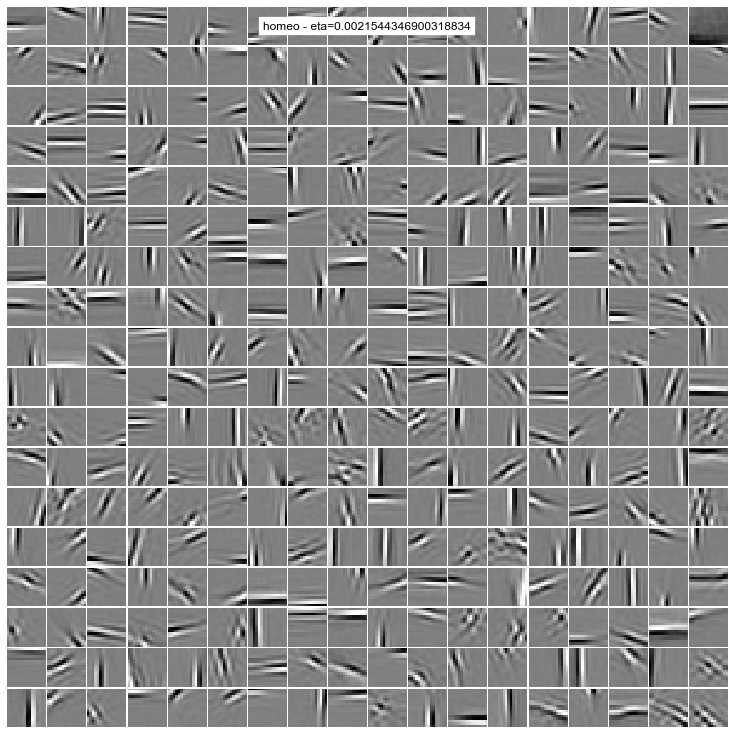

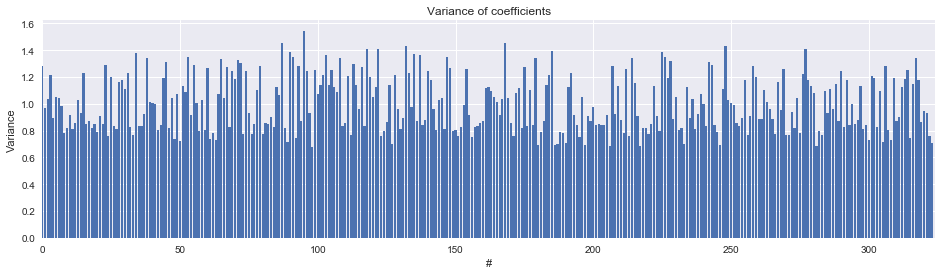

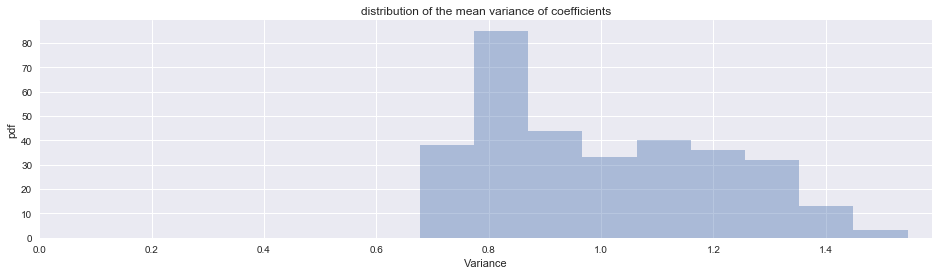

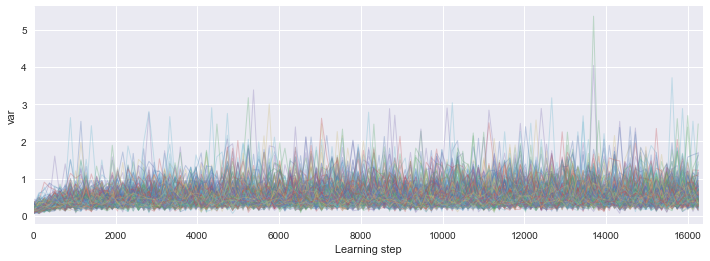

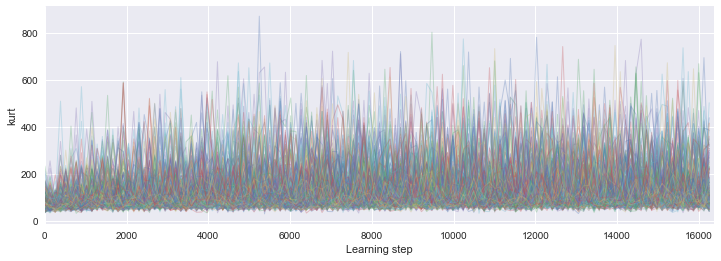

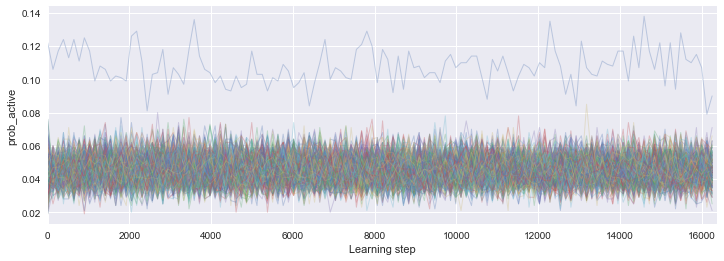

In [3]:
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    matname = 'homeo - eta={}'.format(eta)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', eta=eta, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

In [ ]:
for eta_homeo in np.logspace(-1, 1, N_scan, base=10)*shl.eta_homeo:
    matname = 'homeo - eta_homeo={eta_homeo}'.format(eta_homeo=eta_homeo)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', eta_homeo=eta_homeo, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)    

In [ ]:
2**np.arange(N_scan)

In [ ]:
for l0_sparseness in 2**np.arange(N_scan):
    matname = 'homeo - l0_sparseness={l0_sparseness}'.format(l0_sparseness=l0_sparseness)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              l0_sparseness=l0_sparseness, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)      

## Version used

In [ ]:
import version_information
%version_information numpy, shl_scripts